In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [129]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [130]:
results = pd.read_csv('results/explore_test1', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall','cg','avggain'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [131]:
results = results.fillna(0)

In [132]:
domains

[418, 35774, 694, 1677]

In [133]:
results

,ranker,day,domain,correct,total,precision,recall,cg,avggain
0,popevent_popularityexplore,1,596,0,0,0.000000,0.000000,0.000000,0.000000
1,popevent_popularityexplore,1,418,110,8673,0.012683,0.050179,27.597747,0.250889
2,popevent_popularityexplore,1,35774,14669,60688,0.241712,0.079585,49.488117,0.003374
3,popevent_popularityexplore,1,13554,0,0,0.000000,0.000000,0.000000,0.000000
4,popevent_popularityexplore,1,694,19,546,0.034799,0.180000,10.754325,0.566017
5,popevent_popularityexplore,1,3336,0,2,0.000000,0.000000,0.000000,0.000000
6,popevent_popularityexplore,1,1677,10145,26287,0.385932,0.033186,43.177271,0.004256
7,popevent_popularityexplore,1,2522,0,0,0.000000,0.000000,0.000000,0.000000
8,popevent_popularityexplore,2,596,0,0,0.000000,0.000000,0.000000,0.000000
9,popevent_popularityexplore,2,418,2768,8958,0.308998,0.050336,35.916251,0.012976


In [118]:
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]

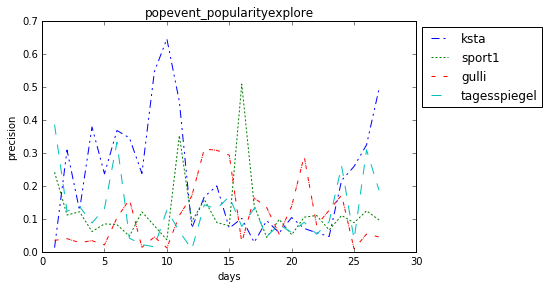

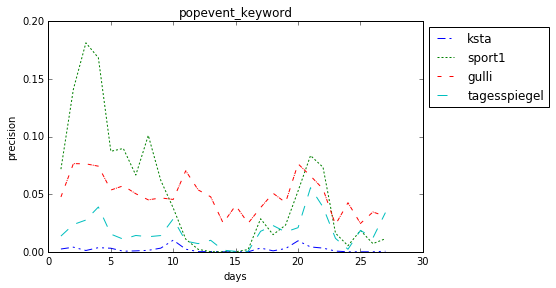

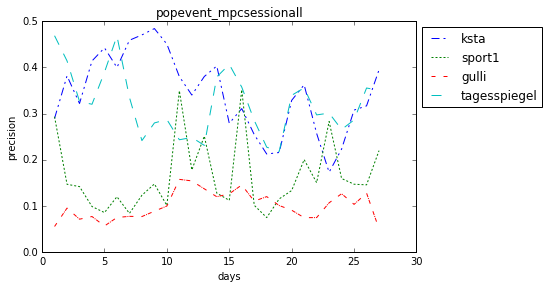

In [119]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1


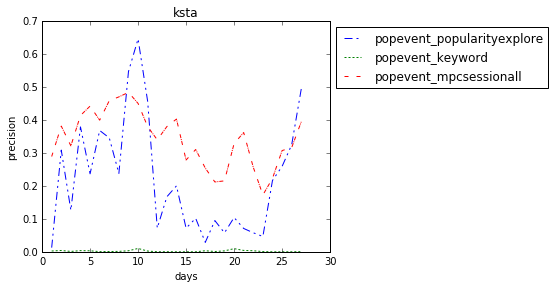

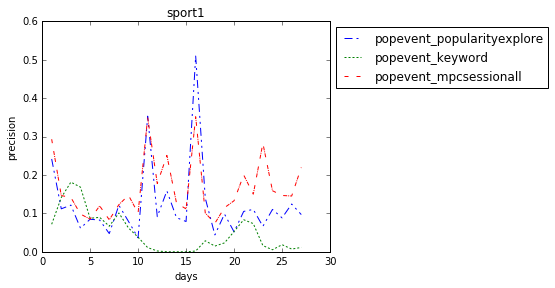

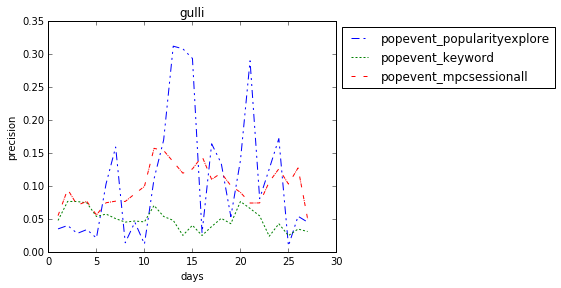

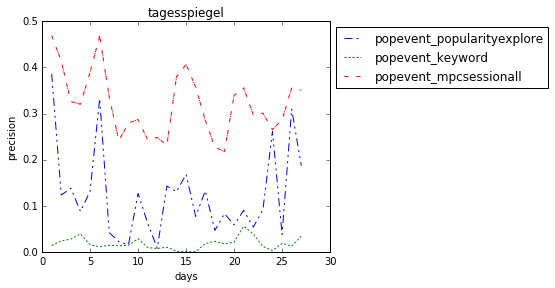

In [139]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
#         ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

        

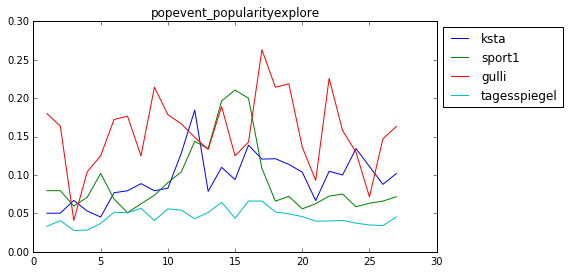

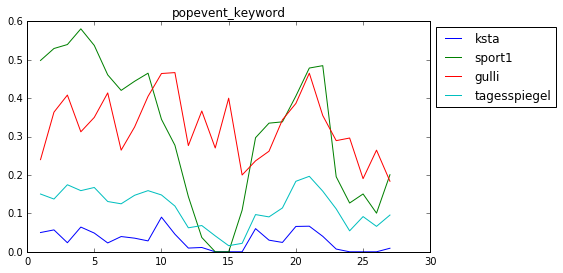

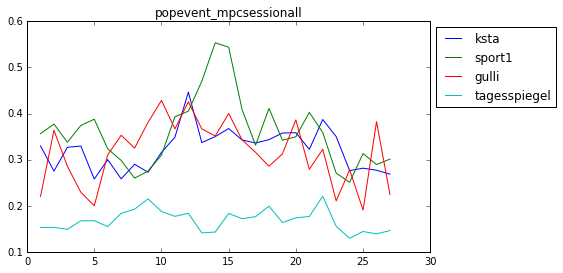

In [121]:
#recall per ranker
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1_recall.png' % ranker)

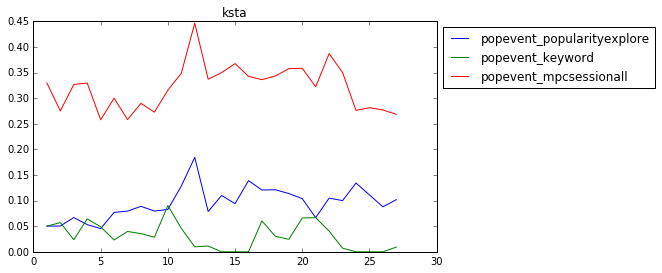

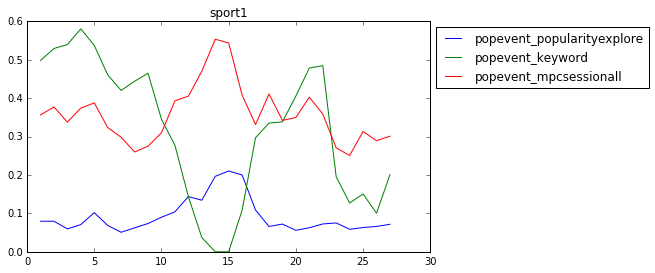

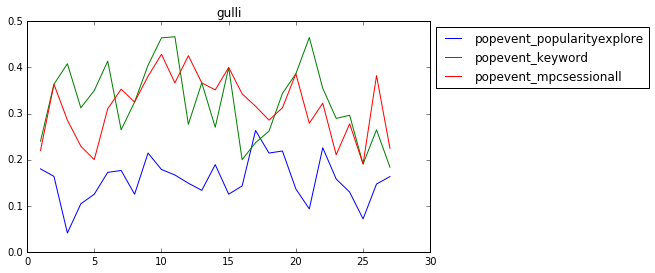

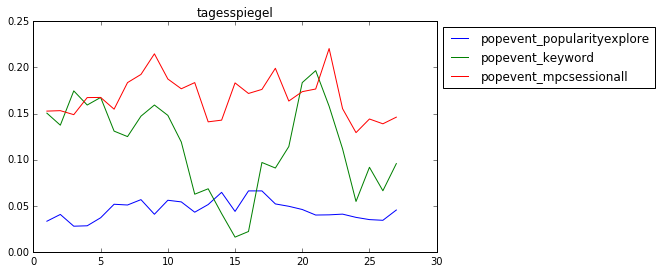

In [122]:
#recall per domain
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)

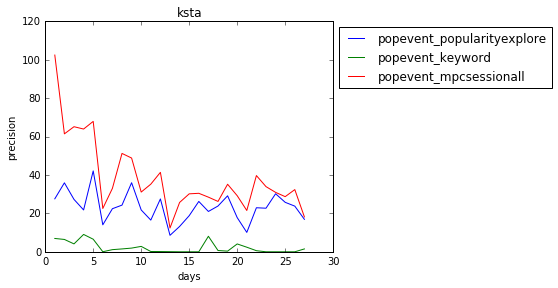

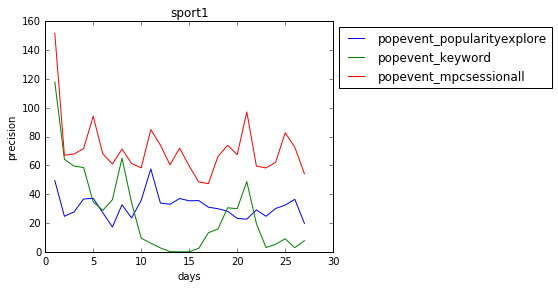

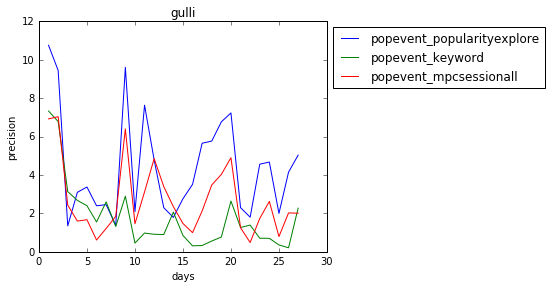

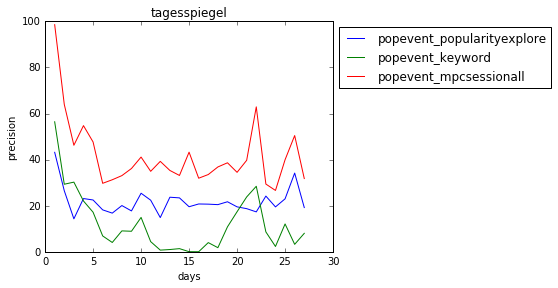

In [123]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['cg']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

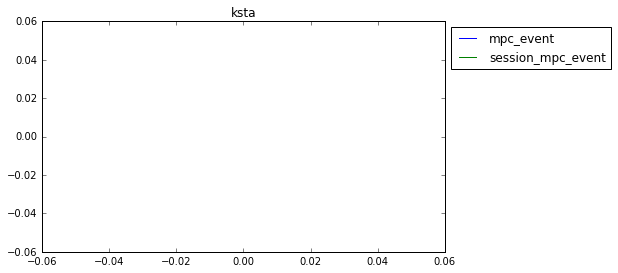

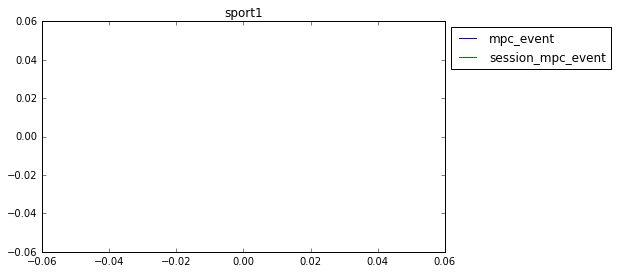

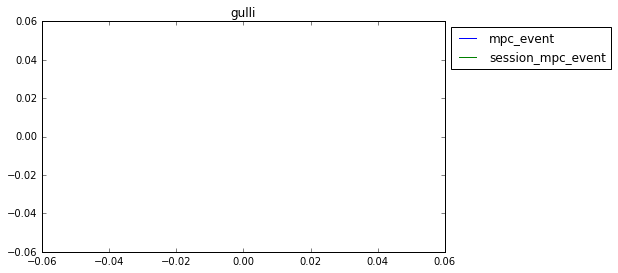

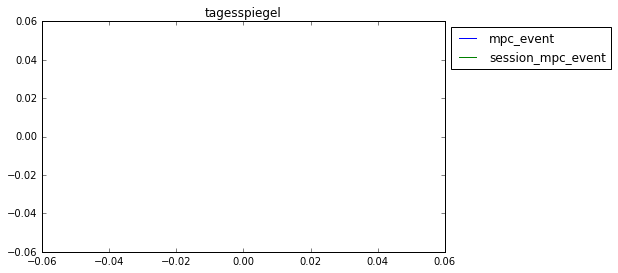

In [124]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

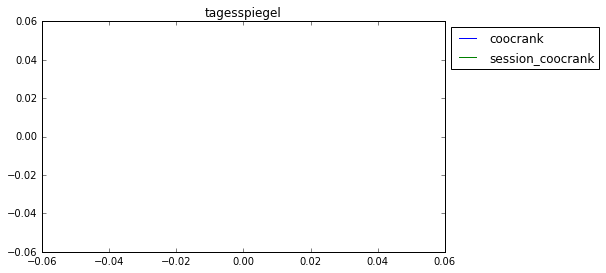

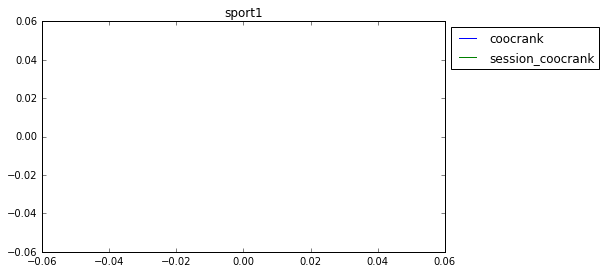

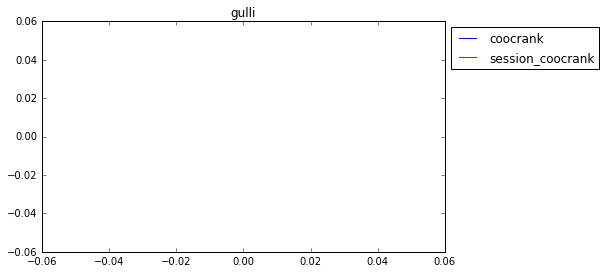

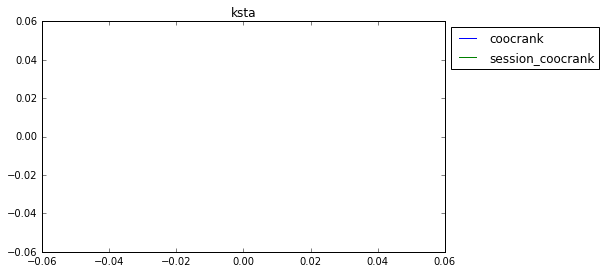

In [47]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [137]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['precision']
        print(domain_mapping[domain], ranker, np.mean(recall.values))
        

ksta popevent_popularityexplore 0.223614422905
ksta popevent_keyword 0.00213818105542
ksta popevent_mpcsessionall 0.342723058208
sport1 popevent_popularityexplore 0.122411432012
sport1 popevent_keyword 0.0502777392915
sport1 popevent_mpcsessionall 0.16420097206
gulli popevent_popularityexplore 0.110424073337
gulli popevent_keyword 0.0488951487895
gulli popevent_mpcsessionall 0.0995430548955
tagesspiegel popevent_popularityexplore 0.123762784467
tagesspiegel popevent_keyword 0.0177898121777
tagesspiegel popevent_mpcsessionall 0.32139822625


In [140]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker, np.mean(recall.values))

popevent_popularityexplore 0.0973257937753
popevent_keyword 0.196513711022
popevent_mpcsessionall 0.291523735633


In [141]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker, np.mean(precision.values))

popevent_popularityexplore 0.145053178181
popevent_keyword 0.0297752203285
popevent_mpcsessionall 0.231966327853


In [142]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['cg']
    print(ranker, np.mean(precision.values))

popevent_popularityexplore 20.2745104438
popevent_keyword 10.5492594513
popevent_mpcsessionall 38.5039853557


In [143]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['avggain']
    print(ranker, np.mean(precision.values))

popevent_popularityexplore 0.0620203621779
popevent_keyword 0.0647416854326
popevent_mpcsessionall 0.0237334795583
